In [224]:
#load data and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv(r'C:\Users\LENOVO\python\datasets\glaucoma_dataset\glaucoma_dataset.csv')
df.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,NaN,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma


## https://www.kaggle.com/datasets/teamincribo/glaucoma-detection-dataset

In [225]:
# see the type of tghe columns and see if there are missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             7453 non-null   object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

In [229]:
# target variable
df['Diagnosis'].value_counts()

Diagnosis
Glaucoma       5012
No Glaucoma    4988
Name: count, dtype: int64

In [230]:

len(df.select_dtypes('number').columns)

5

In [231]:
df.describe()

,Patient ID,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50002.16880,53.872200,17.507527,0.548437,549.733974
std,28939.82498,21.127563,4.356101,0.144326,28.902741
min,4.00000,18.000000,10.000000,0.300000,500.010000
25%,24660.25000,36.000000,13.760000,0.420000,524.590000
50%,50091.50000,54.000000,17.485000,0.550000,549.335000
75%,74829.25000,72.000000,21.300000,0.670000,574.972500
max,99992.00000,90.000000,25.000000,0.800000,599.990000


In [232]:
#convert variables into int
df['Diagnosis']=df['Diagnosis'].apply(lambda x: 1 if x=='Glaucoma' else 0)

In [233]:
df['Angle Closure Status'].value_counts(normalize=True)

Angle Closure Status
Closed    0.5075
Open      0.4925
Name: proportion, dtype: float64

In [234]:
df['Angle Closure Status']=df['Angle Closure Status'].apply(lambda x: 1 if x=='Open' else 0)

In [235]:
df['Angle Closure Status'].value_counts(normalize=True)

Angle Closure Status
0    0.5075
1    0.4925
Name: proportion, dtype: float64

In [236]:
df['Family History'].value_counts(normalize=True)

Family History
No     0.5025
Yes    0.4975
Name: proportion, dtype: float64

In [237]:
df['Family History']=df['Family History'].apply(lambda x: 1 if x=='Yes' else 0)

In [238]:
df['Family History'].value_counts(normalize=True)

Family History
0    0.5025
1    0.4975
Name: proportion, dtype: float64

In [239]:
df['Cataract Status'].value_counts(normalize=True)

Cataract Status
Absent     0.507
Present    0.493
Name: proportion, dtype: float64

In [240]:
df['Cataract Status']=df['Cataract Status'].apply(lambda x: 1 if x=='Present' else 0)

In [241]:
df.sample(10)

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
6541,74369,68,Female,LogMAR 0.1,21.79,0.70,1,NaN,"Lisinopril, Atorvastatin, Aspirin, Ibuprofen, ...","Sensitivity: 0.67, Specificity: 0.81","RNFL Thickness: 90.54 µm, GCC Thickness: 65.08...",551.86,1,0,"Redness in the eye, Halos around lights, Visio...",1,Secondary Glaucoma
24,83074,80,Male,LogMAR 0.1,21.26,0.68,1,Hypertension,"Omeprazole, Amoxicillin, Lisinopril","Sensitivity: 0.92, Specificity: 0.87","RNFL Thickness: 97.64 µm, GCC Thickness: 58.03...",586.86,0,1,"Nausea, Halos around lights, Tunnel vision",1,Normal-Tension Glaucoma
2383,43335,61,Female,LogMAR 0.1,16.13,0.67,0,Diabetes,"Amoxicillin, Aspirin","Sensitivity: 0.77, Specificity: 0.71","RNFL Thickness: 96.50 µm, GCC Thickness: 59.58...",587.29,1,1,"Tunnel vision, Vomiting, Tunnel vision",1,Congenital Glaucoma
1619,91573,72,Female,20/20,18.94,0.39,0,NaN,"Amoxicillin, Atorvastatin, Metformin, Omeprazo...","Sensitivity: 0.78, Specificity: 0.72","RNFL Thickness: 89.66 µm, GCC Thickness: 56.84...",541.95,0,0,"Vision loss, Nausea, Halos around lights",1,Secondary Glaucoma
217,18994,45,Female,20/40,18.91,0.47,1,Diabetes,NaN,"Sensitivity: 0.81, Specificity: 0.75","RNFL Thickness: 95.87 µm, GCC Thickness: 60.81...",508.78,1,1,"Redness in the eye, Vomiting, Vision loss",0,Primary Open-Angle Glaucoma
3434,73385,33,Female,20/40,24.50,0.40,0,Diabetes,"Lisinopril, Amoxicillin, Ibuprofen, Omeprazole...","Sensitivity: 0.82, Specificity: 0.97","RNFL Thickness: 84.54 µm, GCC Thickness: 63.40...",517.01,0,0,"Vomiting, Tunnel vision, Eye pain",1,Normal-Tension Glaucoma
7030,12531,77,Female,LogMAR 0.1,24.48,0.35,1,Diabetes,"Ibuprofen, Atorvastatin, Aspirin, Metformin, L...","Sensitivity: 0.62, Specificity: 0.92","RNFL Thickness: 84.15 µm, GCC Thickness: 55.26...",509.95,1,1,"Halos around lights, Vomiting, Tunnel vision",1,Juvenile Glaucoma
3998,58606,54,Male,LogMAR 0.0,24.60,0.76,1,NaN,"Metformin, Aspirin, Amoxicillin, Ibuprofen, At...","Sensitivity: 0.94, Specificity: 0.89","RNFL Thickness: 85.16 µm, GCC Thickness: 68.46...",536.56,1,0,"Eye pain, Vomiting, Redness in the eye",1,Normal-Tension Glaucoma
3810,49328,55,Male,LogMAR 0.1,14.98,0.34,1,NaN,"Metformin, Atorvastatin","Sensitivity: 0.66, Specificity: 0.77","RNFL Thickness: 86.33 µm, GCC Thickness: 68.56...",573.57,1,1,"Redness in the eye, Tunnel vision, Vision loss",1,Angle-Closure Glaucoma
7643,11877,23,Male,LogMAR 0.0,22.02,0.49,0,Hypertension,Atorvastatin,"Sensitivity: 0.69, Specificity: 0.79","RNFL Thickness: 80.50 µm, GCC Thickness: 68.35...",534.33,0,0,"Vomiting, Halos around lights, Vision loss",0,Primary Open-Angle Glaucoma


In [242]:
df['Family History'].value_counts()

Family History
0    5025
1    4975
Name: count, dtype: int64

In [243]:
df['Visual Acuity Measurements'].value_counts()

Visual Acuity Measurements
LogMAR 0.0    2551
LogMAR 0.1    2518
20/20         2489
20/40         2442
Name: count, dtype: int64

### LogMAR 0.0 in scala Snellen (20 pies) 20/20
### LogMAR 0.1 in scala Snellen (20 pies) 20/25

In [244]:
df['Visual Acuity Measurements']=df['Visual Acuity Measurements'].apply(lambda x: x.replace('20/20', "LogMAR 0.0"))

In [245]:
df['Visual Acuity Measurements']=df['Visual Acuity Measurements'].apply(lambda x: x.replace('20/40', "LogMAR 0.3"))

In [246]:
df['Visual Acuity Measurements'].value_counts()

Visual Acuity Measurements
LogMAR 0.0    5040
LogMAR 0.1    2518
LogMAR 0.3    2442
Name: count, dtype: int64

In [247]:
df['Medical History'].value_counts(normalize=True)

Medical History
Hypertension          0.334228
Glaucoma in family    0.334228
Diabetes              0.331544
Name: proportion, dtype: float64

In [248]:
df['Medical History']=df['Medical History'].apply(lambda x: str(x).replace('Glaucoma in family', 'Glaucoma'))

In [249]:
df['Medical History'].value_counts(normalize=True)*100


Medical History
nan             25.47
Hypertension    24.91
Glaucoma        24.91
Diabetes        24.71
Name: proportion, dtype: float64

In [250]:
df.isna().sum()

Patient ID                                       0
Age                                              0
Gender                                           0
Visual Acuity Measurements                       0
Intraocular Pressure (IOP)                       0
Cup-to-Disc Ratio (CDR)                          0
Family History                                   0
Medical History                                  0
Medication Usage                              1231
Visual Field Test Results                        0
Optical Coherence Tomography (OCT) Results       0
Pachymetry                                       0
Cataract Status                                  0
Angle Closure Status                             0
Visual Symptoms                                  0
Diagnosis                                        0
Glaucoma Type                                    0
dtype: int64

In [252]:
df['Medical History'].value_counts(normalize=True)*100


Medical History
nan             25.47
Hypertension    24.91
Glaucoma        24.91
Diabetes        24.71
Name: proportion, dtype: float64

In [253]:
df['Medical History']=df['Medical History'].apply(lambda x: str(x).replace('nan', 'No Medical History'))

In [254]:
df['Medical History'].value_counts(normalize=True)*100


Medical History
No Medical History    25.47
Hypertension          24.91
Glaucoma              24.91
Diabetes              24.71
Name: proportion, dtype: float64

In [256]:
df.drop(columns = ['Patient ID'], inplace = True)
df

,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,69,Male,LogMAR 0.1,19.46,0.42,0,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,1,1,"Tunnel vision, Eye pain, Nausea",0,Primary Open-Angle Glaucoma
1,69,Female,LogMAR 0.1,18.39,0.72,0,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,0,1,"Redness in the eye, Vision loss, Tunnel vision",0,Juvenile Glaucoma
2,67,Female,LogMAR 0.3,23.65,0.72,0,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,0,0,"Halos around lights, Vision loss, Redness in t...",0,Juvenile Glaucoma
3,23,Male,LogMAR 0.0,18.04,0.61,0,No Medical History,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,0,0,"Nausea, Nausea, Halos around lights",0,Congenital Glaucoma
4,21,Male,LogMAR 0.1,15.87,0.30,0,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,0,0,"Eye pain, Eye pain, Tunnel vision",0,Primary Open-Angle Glaucoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,81,Female,LogMAR 0.1,22.83,0.49,0,No Medical History,NaN,"Sensitivity: 0.81, Specificity: 0.97","RNFL Thickness: 83.41 µm, GCC Thickness: 66.55...",576.53,0,1,"Eye pain, Eye pain, Tunnel vision",1,Normal-Tension Glaucoma
9996,65,Male,LogMAR 0.0,11.72,0.54,0,Diabetes,Lisinopril,"Sensitivity: 0.7, Specificity: 0.97","RNFL Thickness: 83.04 µm, GCC Thickness: 63.24...",548.10,0,1,"Eye pain, Halos around lights, Vomiting",0,Normal-Tension Glaucoma
9997,56,Female,LogMAR 0.3,10.67,0.56,1,Diabetes,Ibuprofen,"Sensitivity: 0.8, Specificity: 0.9","RNFL Thickness: 95.93 µm, GCC Thickness: 59.78...",513.74,1,1,"Vision loss, Vomiting, Blurred vision",0,Secondary Glaucoma
9998,26,Male,LogMAR 0.1,23.37,0.74,0,Glaucoma,NaN,"Sensitivity: 0.68, Specificity: 0.9","RNFL Thickness: 92.84 µm, GCC Thickness: 69.35...",585.03,0,0,"Halos around lights, Nausea, Nausea",1,Normal-Tension Glaucoma


In [257]:
df[['Test Sensitivity','Test Specificity']] = df['Visual Field Test Results'].str.split(',',expand=True)

In [258]:
df.head()

,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type,Test Sensitivity,Test Specificity
0,69,Male,LogMAR 0.1,19.46,0.42,0,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,1,1,"Tunnel vision, Eye pain, Nausea",0,Primary Open-Angle Glaucoma,Sensitivity: 0.54,Specificity: 0.75
1,69,Female,LogMAR 0.1,18.39,0.72,0,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,0,1,"Redness in the eye, Vision loss, Tunnel vision",0,Juvenile Glaucoma,Sensitivity: 0.72,Specificity: 0.88
2,67,Female,LogMAR 0.3,23.65,0.72,0,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,0,0,"Halos around lights, Vision loss, Redness in t...",0,Juvenile Glaucoma,Sensitivity: 0.56,Specificity: 0.8
3,23,Male,LogMAR 0.0,18.04,0.61,0,No Medical History,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,0,0,"Nausea, Nausea, Halos around lights",0,Congenital Glaucoma,Sensitivity: 0.6,Specificity: 0.93
4,21,Male,LogMAR 0.1,15.87,0.30,0,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,0,0,"Eye pain, Eye pain, Tunnel vision",0,Primary Open-Angle Glaucoma,Sensitivity: 0.82,Specificity: 0.9


In [259]:
df.drop(columns = ['Visual Field Test Results'], inplace = True)
df

,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type,Test Sensitivity,Test Specificity
0,69,Male,LogMAR 0.1,19.46,0.42,0,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,1,1,"Tunnel vision, Eye pain, Nausea",0,Primary Open-Angle Glaucoma,Sensitivity: 0.54,Specificity: 0.75
1,69,Female,LogMAR 0.1,18.39,0.72,0,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,0,1,"Redness in the eye, Vision loss, Tunnel vision",0,Juvenile Glaucoma,Sensitivity: 0.72,Specificity: 0.88
2,67,Female,LogMAR 0.3,23.65,0.72,0,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,0,0,"Halos around lights, Vision loss, Redness in t...",0,Juvenile Glaucoma,Sensitivity: 0.56,Specificity: 0.8
3,23,Male,LogMAR 0.0,18.04,0.61,0,No Medical History,"Ibuprofen, Aspirin","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,0,0,"Nausea, Nausea, Halos around lights",0,Congenital Glaucoma,Sensitivity: 0.6,Specificity: 0.93
4,21,Male,LogMAR 0.1,15.87,0.30,0,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,0,0,"Eye pain, Eye pain, Tunnel vision",0,Primary Open-Angle Glaucoma,Sensitivity: 0.82,Specificity: 0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,81,Female,LogMAR 0.1,22.83,0.49,0,No Medical History,NaN,"RNFL Thickness: 83.41 µm, GCC Thickness: 66.55...",576.53,0,1,"Eye pain, Eye pain, Tunnel vision",1,Normal-Tension Glaucoma,Sensitivity: 0.81,Specificity: 0.97
9996,65,Male,LogMAR 0.0,11.72,0.54,0,Diabetes,Lisinopril,"RNFL Thickness: 83.04 µm, GCC Thickness: 63.24...",548.10,0,1,"Eye pain, Halos around lights, Vomiting",0,Normal-Tension Glaucoma,Sensitivity: 0.7,Specificity: 0.97
9997,56,Female,LogMAR 0.3,10.67,0.56,1,Diabetes,Ibuprofen,"RNFL Thickness: 95.93 µm, GCC Thickness: 59.78...",513.74,1,1,"Vision loss, Vomiting, Blurred vision",0,Secondary Glaucoma,Sensitivity: 0.8,Specificity: 0.9
9998,26,Male,LogMAR 0.1,23.37,0.74,0,Glaucoma,NaN,"RNFL Thickness: 92.84 µm, GCC Thickness: 69.35...",585.03,0,0,"Halos around lights, Nausea, Nausea",1,Normal-Tension Glaucoma,Sensitivity: 0.68,Specificity: 0.9


In [260]:
df['Test Sensitivity'] = df['Test Sensitivity'].apply(lambda x: x.replace('Sensitivity:', ""))
df['Test Specificity'] = df['Test Specificity'].apply(lambda x: x.replace('Specificity:', ""))

In [261]:
df.head()


,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type,Test Sensitivity,Test Specificity
0,69,Male,LogMAR 0.1,19.46,0.42,0,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,1,1,"Tunnel vision, Eye pain, Nausea",0,Primary Open-Angle Glaucoma,0.54,0.75
1,69,Female,LogMAR 0.1,18.39,0.72,0,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,0,1,"Redness in the eye, Vision loss, Tunnel vision",0,Juvenile Glaucoma,0.72,0.88
2,67,Female,LogMAR 0.3,23.65,0.72,0,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,0,0,"Halos around lights, Vision loss, Redness in t...",0,Juvenile Glaucoma,0.56,0.8
3,23,Male,LogMAR 0.0,18.04,0.61,0,No Medical History,"Ibuprofen, Aspirin","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,0,0,"Nausea, Nausea, Halos around lights",0,Congenital Glaucoma,0.6,0.93
4,21,Male,LogMAR 0.1,15.87,0.30,0,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,0,0,"Eye pain, Eye pain, Tunnel vision",0,Primary Open-Angle Glaucoma,0.82,0.9


In [262]:
df['Optical Coherence Tomography (OCT) Results'].unique()

array(['RNFL Thickness: 86.48 µm, GCC Thickness: 64.14 µm, Retinal Volume: 5.63 mm³, Macular Thickness: 283.67 µm',
       'RNFL Thickness: 96.88 µm, GCC Thickness: 56.48 µm, Retinal Volume: 5.69 mm³, Macular Thickness: 261.48 µm',
       'RNFL Thickness: 89.81 µm, GCC Thickness: 59.05 µm, Retinal Volume: 5.96 mm³, Macular Thickness: 282.34 µm',
       ...,
       'RNFL Thickness: 95.93 µm, GCC Thickness: 59.78 µm, Retinal Volume: 5.85 mm³, Macular Thickness: 280.84 µm',
       'RNFL Thickness: 92.84 µm, GCC Thickness: 69.35 µm, Retinal Volume: 5.54 mm³, Macular Thickness: 270.12 µm',
       'RNFL Thickness: 88.77 µm, GCC Thickness: 58.74 µm, Retinal Volume: 5.87 mm³, Macular Thickness: 262.64 µm'],
      dtype=object)

In [263]:
df[['OCT_RNFL','OCT_GCC','Retinal Volume','OCT_Macular']] = df['Optical Coherence Tomography (OCT) Results'].str.split(',',expand=True)


In [264]:
df.head()

,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Optical Coherence Tomography (OCT) Results,Pachymetry,...,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type,Test Sensitivity,Test Specificity,OCT_RNFL,OCT_GCC,Retinal Volume,OCT_Macular
0,69,Male,LogMAR 0.1,19.46,0.42,0,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,...,1,"Tunnel vision, Eye pain, Nausea",0,Primary Open-Angle Glaucoma,0.54,0.75,RNFL Thickness: 86.48 µm,GCC Thickness: 64.14 µm,Retinal Volume: 5.63 mm³,Macular Thickness: 283.67 µm
1,69,Female,LogMAR 0.1,18.39,0.72,0,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,...,1,"Redness in the eye, Vision loss, Tunnel vision",0,Juvenile Glaucoma,0.72,0.88,RNFL Thickness: 96.88 µm,GCC Thickness: 56.48 µm,Retinal Volume: 5.69 mm³,Macular Thickness: 261.48 µm
2,67,Female,LogMAR 0.3,23.65,0.72,0,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,...,0,"Halos around lights, Vision loss, Redness in t...",0,Juvenile Glaucoma,0.56,0.8,RNFL Thickness: 89.81 µm,GCC Thickness: 59.05 µm,Retinal Volume: 5.96 mm³,Macular Thickness: 282.34 µm
3,23,Male,LogMAR 0.0,18.04,0.61,0,No Medical History,"Ibuprofen, Aspirin","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,...,0,"Nausea, Nausea, Halos around lights",0,Congenital Glaucoma,0.6,0.93,RNFL Thickness: 87.25 µm,GCC Thickness: 63.98 µm,Retinal Volume: 6.44 mm³,Macular Thickness: 262.86 µm
4,21,Male,LogMAR 0.1,15.87,0.30,0,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,...,0,"Eye pain, Eye pain, Tunnel vision",0,Primary Open-Angle Glaucoma,0.82,0.9,RNFL Thickness: 82.61 µm,GCC Thickness: 66.01 µm,Retinal Volume: 6.16 mm³,Macular Thickness: 261.78 µm


In [265]:
df.drop(columns = ['Optical Coherence Tomography (OCT) Results'], inplace = True)
df['OCT_RNFL'] = df['OCT_RNFL'].apply(lambda x: x.replace('RNFL Thickness: ', ""))
df['OCT_GCC'] = df['OCT_GCC'].apply(lambda x: x.replace('GCC Thickness: ', ""))
df['Retinal Volume'] = df['Retinal Volume'].apply(lambda x: x.replace('Retinal Volume: ', ""))
df['OCT_Macular'] = df['OCT_Macular'].apply(lambda x: x.replace('Macular Thickness: ', ""))

In [266]:
df.head(10)

,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type,Test Sensitivity,Test Specificity,OCT_RNFL,OCT_GCC,Retinal Volume,OCT_Macular
0,69,Male,LogMAR 0.1,19.46,0.42,0,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...",541.51,1,1,"Tunnel vision, Eye pain, Nausea",0,Primary Open-Angle Glaucoma,0.54,0.75,86.48 µm,64.14 µm,5.63 mm³,283.67 µm
1,69,Female,LogMAR 0.1,18.39,0.72,0,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...",552.77,0,1,"Redness in the eye, Vision loss, Tunnel vision",0,Juvenile Glaucoma,0.72,0.88,96.88 µm,56.48 µm,5.69 mm³,261.48 µm
2,67,Female,LogMAR 0.3,23.65,0.72,0,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...",573.65,0,0,"Halos around lights, Vision loss, Redness in t...",0,Juvenile Glaucoma,0.56,0.8,89.81 µm,59.05 µm,5.96 mm³,282.34 µm
3,23,Male,LogMAR 0.0,18.04,0.61,0,No Medical History,"Ibuprofen, Aspirin",590.67,0,0,"Nausea, Nausea, Halos around lights",0,Congenital Glaucoma,0.6,0.93,87.25 µm,63.98 µm,6.44 mm³,262.86 µm
4,21,Male,LogMAR 0.1,15.87,0.30,0,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...",588.41,0,0,"Eye pain, Eye pain, Tunnel vision",0,Primary Open-Angle Glaucoma,0.82,0.9,82.61 µm,66.01 µm,6.16 mm³,261.78 µm
5,88,Female,LogMAR 0.3,24.66,0.58,0,No Medical History,"Ibuprofen, Omeprazole, Atorvastatin, Aspirin, ...",562.15,0,0,"Eye pain, Eye pain, Eye pain",0,Juvenile Glaucoma,0.87,0.72,98.01 µm,56.11 µm,6.41 mm³,289.94 µm
6,46,Male,LogMAR 0.3,16.43,0.39,1,Diabetes,"Omeprazole, Ibuprofen, Amoxicillin, Atorvastat...",523.05,1,1,"Nausea, Nausea, Vomiting",1,Juvenile Glaucoma,0.7,0.96,77.92 µm,62.46 µm,5.67 mm³,274.02 µm
7,66,Female,LogMAR 0.1,22.33,0.46,0,Hypertension,"Ibuprofen, Aspirin",552.21,0,1,"Eye pain, Nausea, Halos around lights",0,Primary Open-Angle Glaucoma,0.98,0.83,95.72 µm,58.81 µm,6.00 mm³,267.25 µm
8,60,Male,LogMAR 0.0,12.67,0.52,1,Diabetes,"Ibuprofen, Atorvastatin, Metformin",520.38,0,1,"Blurred vision, Vision loss, Nausea",1,Primary Open-Angle Glaucoma,0.97,0.73,83.78 µm,56.93 µm,5.98 mm³,268.46 µm
9,29,Male,LogMAR 0.0,11.40,0.37,0,No Medical History,NaN,574.23,1,0,"Redness in the eye, Vomiting, Vision loss",0,Congenital Glaucoma,0.94,0.78,80.37 µm,67.89 µm,5.86 mm³,268.39 µm


In [267]:
df['Visual Symptoms']

0                         Tunnel vision, Eye pain, Nausea
1          Redness in the eye, Vision loss, Tunnel vision
2       Halos around lights, Vision loss, Redness in t...
3                     Nausea, Nausea, Halos around lights
4                       Eye pain, Eye pain, Tunnel vision
                              ...                        
9995                    Eye pain, Eye pain, Tunnel vision
9996              Eye pain, Halos around lights, Vomiting
9997                Vision loss, Vomiting, Blurred vision
9998                  Halos around lights, Nausea, Nausea
9999              Eye pain, Eye pain, Halos around lights
Name: Visual Symptoms, Length: 10000, dtype: object

In [268]:
df[['Symptom_1','Symptom_2','Symptom_3']] = df['Visual Symptoms'].str.split(',',expand=True)



In [269]:
df.drop(columns = ['Visual Symptoms'], inplace = True)

In [270]:
df.head()

,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Pachymetry,Cataract Status,...,Glaucoma Type,Test Sensitivity,Test Specificity,OCT_RNFL,OCT_GCC,Retinal Volume,OCT_Macular,Symptom_1,Symptom_2,Symptom_3
0,69,Male,LogMAR 0.1,19.46,0.42,0,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...",541.51,1,...,Primary Open-Angle Glaucoma,0.54,0.75,86.48 µm,64.14 µm,5.63 mm³,283.67 µm,Tunnel vision,Eye pain,Nausea
1,69,Female,LogMAR 0.1,18.39,0.72,0,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...",552.77,0,...,Juvenile Glaucoma,0.72,0.88,96.88 µm,56.48 µm,5.69 mm³,261.48 µm,Redness in the eye,Vision loss,Tunnel vision
2,67,Female,LogMAR 0.3,23.65,0.72,0,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...",573.65,0,...,Juvenile Glaucoma,0.56,0.8,89.81 µm,59.05 µm,5.96 mm³,282.34 µm,Halos around lights,Vision loss,Redness in the eye
3,23,Male,LogMAR 0.0,18.04,0.61,0,No Medical History,"Ibuprofen, Aspirin",590.67,0,...,Congenital Glaucoma,0.6,0.93,87.25 µm,63.98 µm,6.44 mm³,262.86 µm,Nausea,Nausea,Halos around lights
4,21,Male,LogMAR 0.1,15.87,0.30,0,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...",588.41,0,...,Primary Open-Angle Glaucoma,0.82,0.9,82.61 µm,66.01 µm,6.16 mm³,261.78 µm,Eye pain,Eye pain,Tunnel vision


In [271]:
#clean characters
chars_to_remove = [" µm"," mm³"]
# columns to clean
cols_to_clean = ["OCT_RNFL","OCT_GCC","Retinal Volume","OCT_Macular"]

# apply for
for col in cols_to_clean:
    # for each character
    for char in chars_to_remove:
        # replace and apply
        df[col] = df[col].apply(lambda x: x.replace(char, ""))

In [272]:
df.head()

,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Pachymetry,Cataract Status,...,Glaucoma Type,Test Sensitivity,Test Specificity,OCT_RNFL,OCT_GCC,Retinal Volume,OCT_Macular,Symptom_1,Symptom_2,Symptom_3
0,69,Male,LogMAR 0.1,19.46,0.42,0,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...",541.51,1,...,Primary Open-Angle Glaucoma,0.54,0.75,86.48,64.14,5.63,283.67,Tunnel vision,Eye pain,Nausea
1,69,Female,LogMAR 0.1,18.39,0.72,0,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...",552.77,0,...,Juvenile Glaucoma,0.72,0.88,96.88,56.48,5.69,261.48,Redness in the eye,Vision loss,Tunnel vision
2,67,Female,LogMAR 0.3,23.65,0.72,0,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...",573.65,0,...,Juvenile Glaucoma,0.56,0.8,89.81,59.05,5.96,282.34,Halos around lights,Vision loss,Redness in the eye
3,23,Male,LogMAR 0.0,18.04,0.61,0,No Medical History,"Ibuprofen, Aspirin",590.67,0,...,Congenital Glaucoma,0.6,0.93,87.25,63.98,6.44,262.86,Nausea,Nausea,Halos around lights
4,21,Male,LogMAR 0.1,15.87,0.30,0,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...",588.41,0,...,Primary Open-Angle Glaucoma,0.82,0.9,82.61,66.01,6.16,261.78,Eye pain,Eye pain,Tunnel vision


<Axes: >

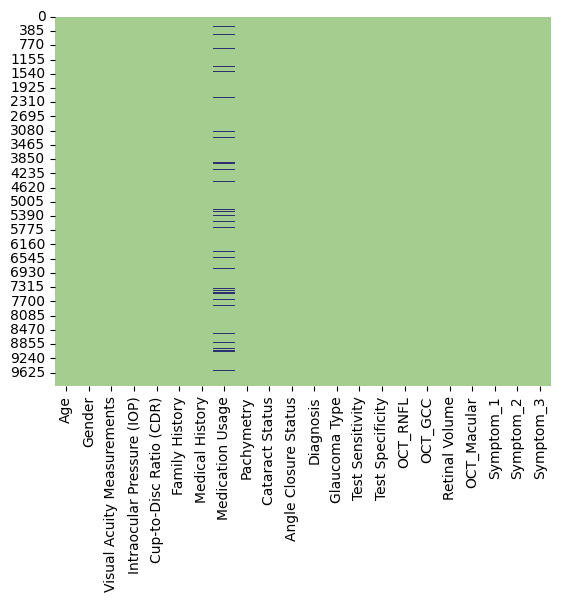

In [273]:
sns.heatmap(df.isna(),cbar=False,cmap="crest")

In [274]:
df['Medication Usage'] = df['Medication Usage'].fillna('No Medical')

<Axes: >

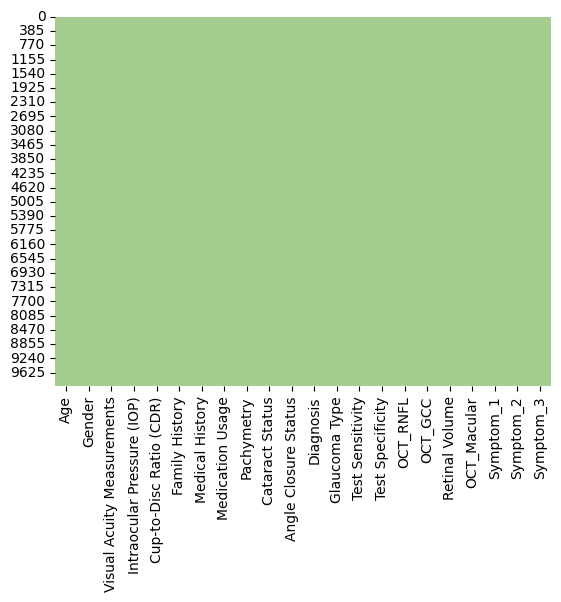

In [275]:
sns.heatmap(df.isna(),cbar=False,cmap="crest")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Intraocular Pressure (IOP)'}>,
        <Axes: title={'center': 'Cup-to-Disc Ratio (CDR)'}>],
       [<Axes: title={'center': 'Family History'}>,
        <Axes: title={'center': 'Pachymetry'}>,
        <Axes: title={'center': 'Cataract Status'}>],
       [<Axes: title={'center': 'Angle Closure Status'}>,
        <Axes: title={'center': 'Diagnosis'}>, <Axes: >]], dtype=object)

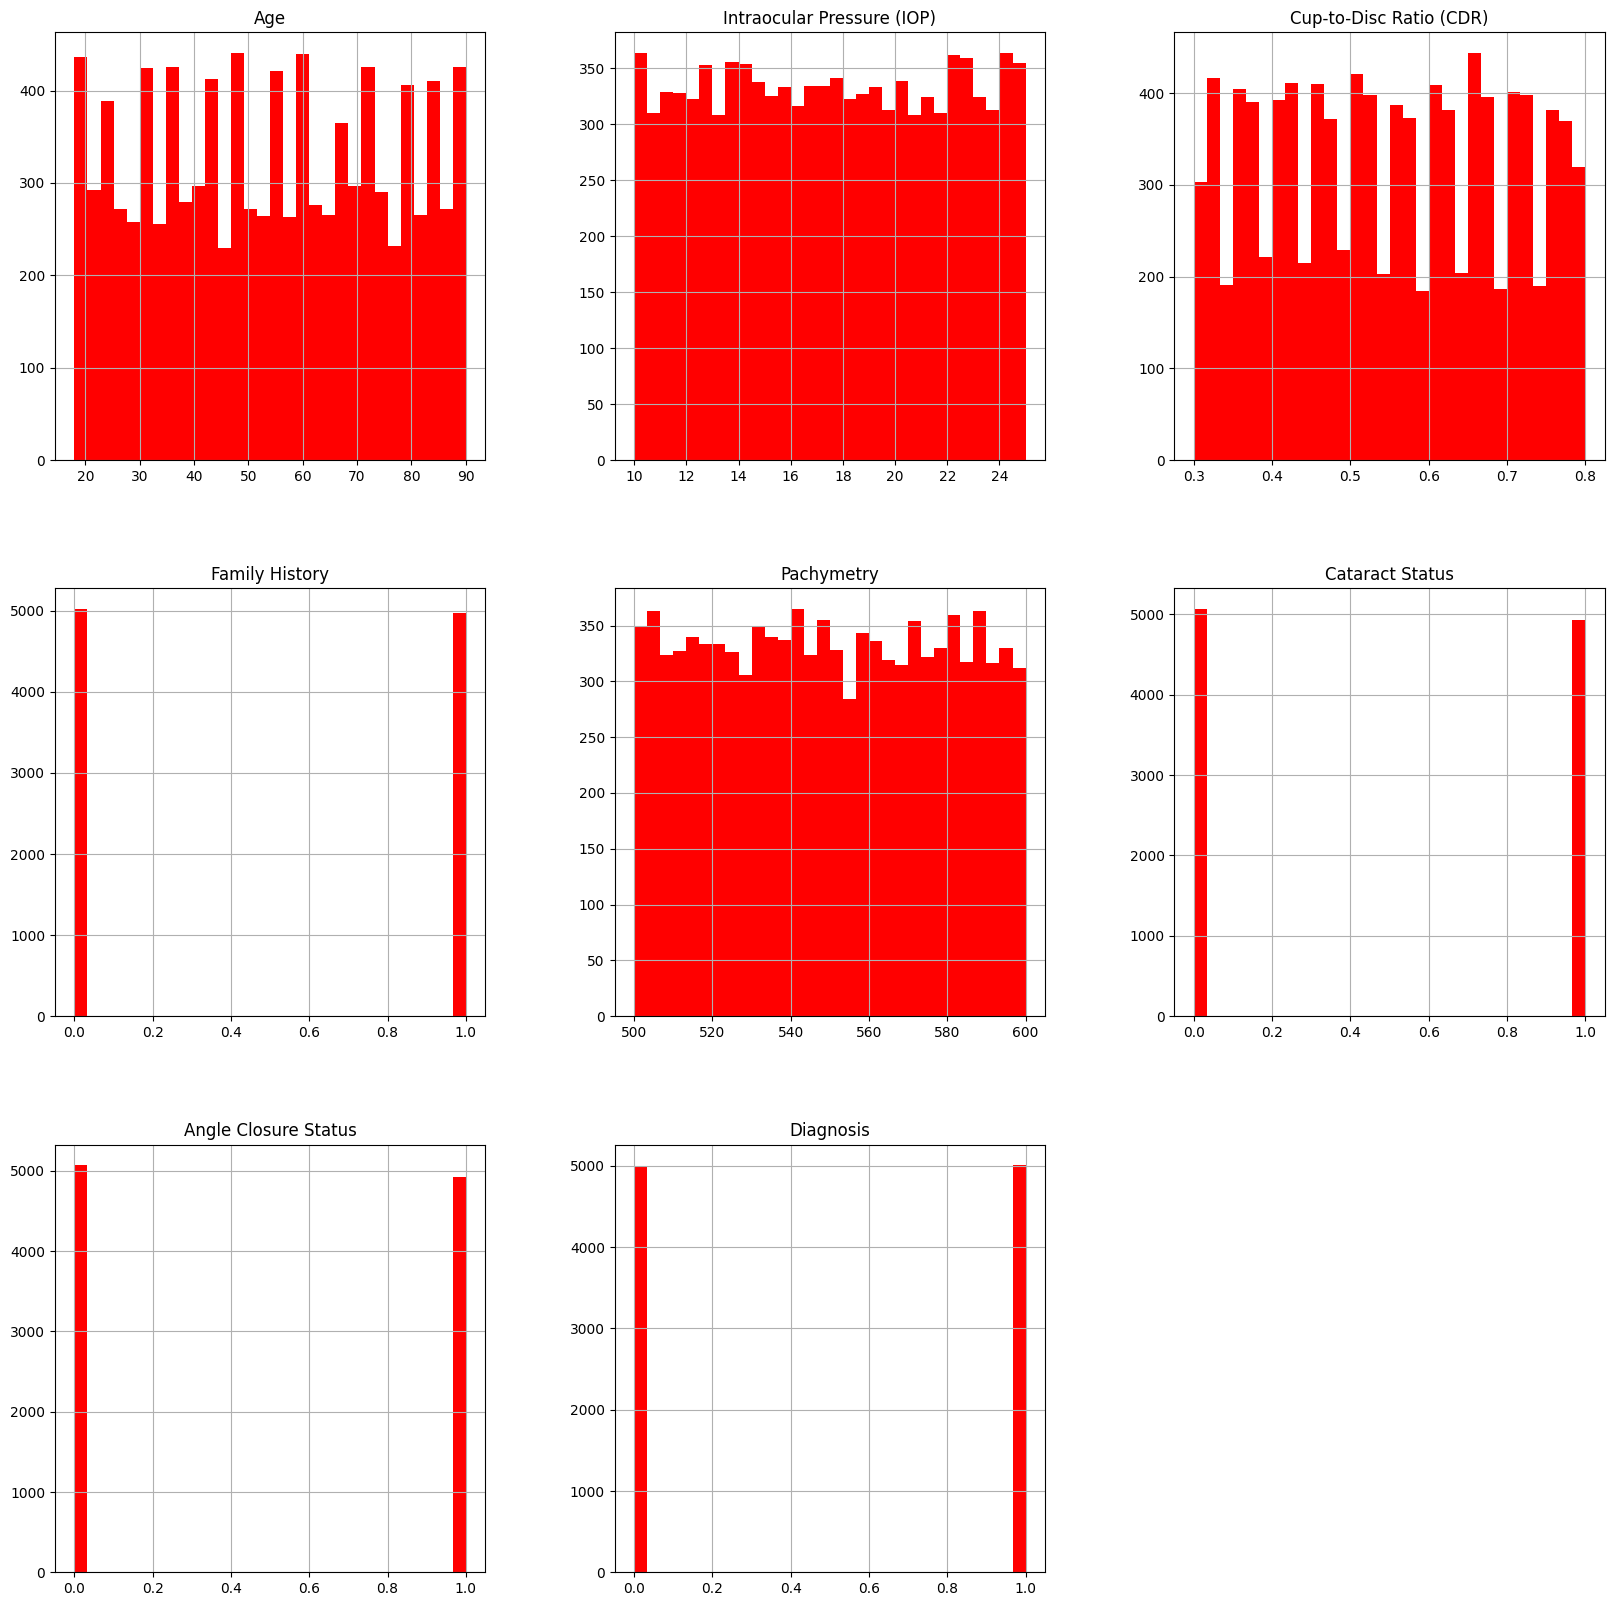

In [276]:
df.hist(bins=30,figsize=(20,20),color='r')

In [277]:
df.describe()


,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Pachymetry,Cataract Status,Angle Closure Status,Diagnosis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.872200,17.507527,0.548437,0.497500,549.733974,0.493000,0.492500,0.501200
std,21.127563,4.356101,0.144326,0.500019,28.902741,0.499976,0.499969,0.500024
min,18.000000,10.000000,0.300000,0.000000,500.010000,0.000000,0.000000,0.000000
25%,36.000000,13.760000,0.420000,0.000000,524.590000,0.000000,0.000000,0.000000
50%,54.000000,17.485000,0.550000,0.000000,549.335000,0.000000,0.000000,1.000000
75%,72.000000,21.300000,0.670000,1.000000,574.972500,1.000000,1.000000,1.000000
max,90.000000,25.000000,0.800000,1.000000,599.990000,1.000000,1.000000,1.000000


In [278]:
have_df= df[df['Diagnosis']==1]
donthave_df= df[df['Diagnosis']==0] 

In [279]:
len(have_df)

5012

In [280]:
len(donthave_df)

4988

In [281]:
print('personas con glaucoma son:',round((len(have_df)/len(df)) *100,2),'%')

personas con glaucoma son: 50.12 %


In [282]:
print('personas sin glaucoma son:',round((len(donthave_df)/len(df)) *100,2),'%')

personas sin glaucoma son: 49.88 %


In [283]:
have_df.describe()

,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Pachymetry,Cataract Status,Angle Closure Status,Diagnosis
count,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.0
mean,53.919992,17.510928,0.548767,0.493416,550.198478,0.498603,0.486034,1.0
std,21.052059,4.351697,0.144037,0.500007,29.163977,0.500048,0.499855,0.0
min,18.000000,10.000000,0.300000,0.000000,500.010000,0.000000,0.000000,1.0
25%,36.000000,13.797500,0.430000,0.000000,524.977500,0.000000,0.000000,1.0
50%,54.000000,17.520000,0.550000,0.000000,549.740000,0.000000,0.000000,1.0
75%,72.000000,21.260000,0.670000,1.000000,575.862500,1.000000,1.000000,1.0
max,90.000000,25.000000,0.800000,1.000000,599.990000,1.000000,1.000000,1.0


In [284]:
donthave_df.describe()

,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Pachymetry,Cataract Status,Angle Closure Status,Diagnosis
count,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.0
mean,53.824178,17.504110,0.548105,0.501604,549.267235,0.487370,0.498998,0.0
std,21.205161,4.360955,0.144629,0.500048,28.633181,0.499891,0.500049,0.0
min,18.000000,10.000000,0.300000,0.000000,500.020000,0.000000,0.000000,0.0
25%,36.000000,13.720000,0.420000,0.000000,524.407500,0.000000,0.000000,0.0
50%,54.000000,17.440000,0.550000,1.000000,548.865000,0.000000,0.000000,0.0
75%,72.000000,21.342500,0.670000,1.000000,574.030000,1.000000,1.000000,0.0
max,90.000000,24.990000,0.800000,1.000000,599.990000,1.000000,1.000000,0.0


<Axes: >

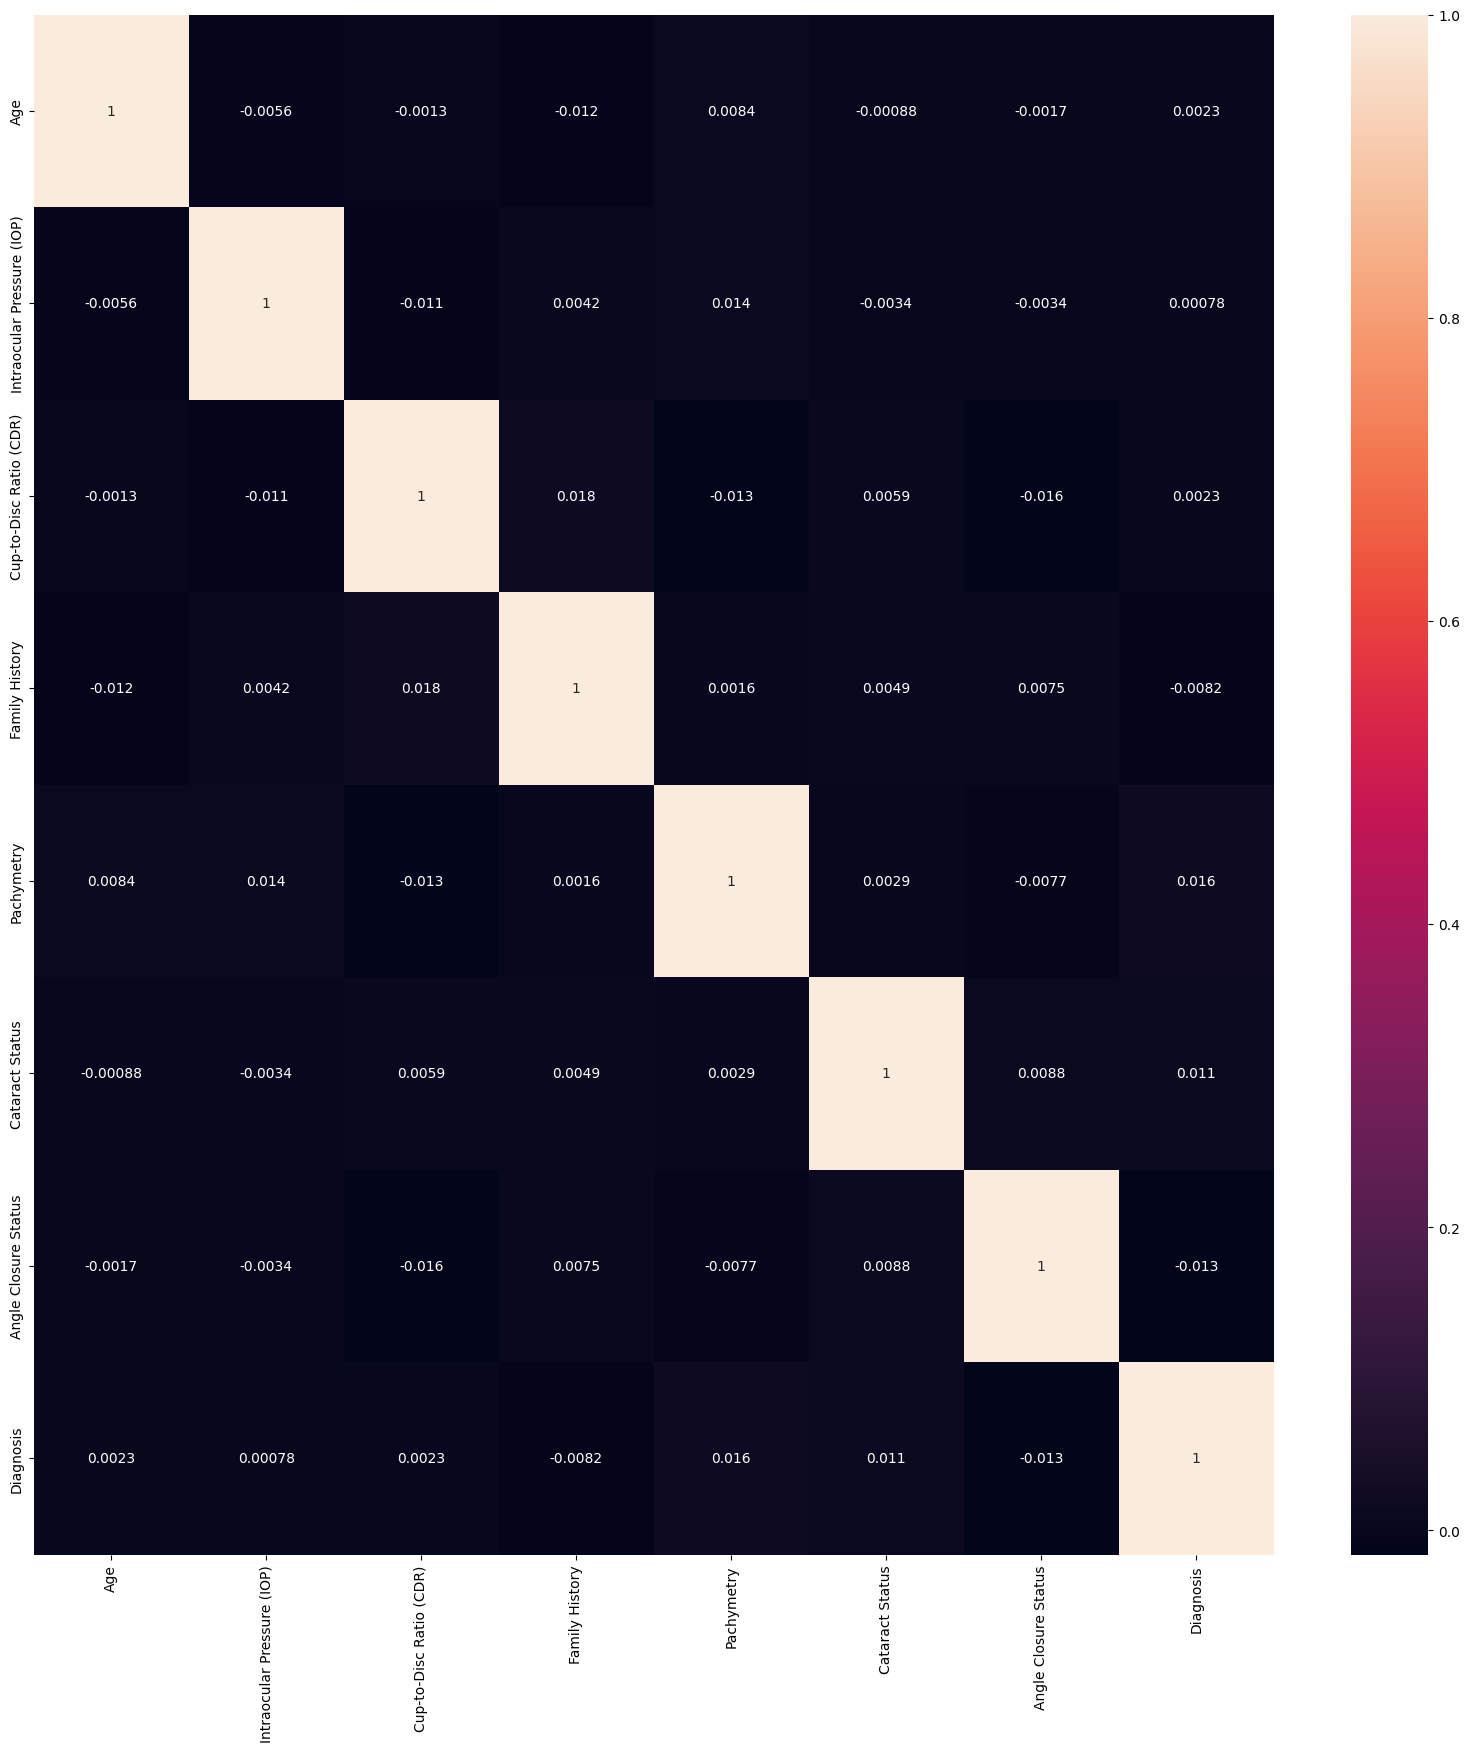

In [285]:
correlations=df.corr(numeric_only=True)
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True)

<Axes: xlabel='Age', ylabel='count'>

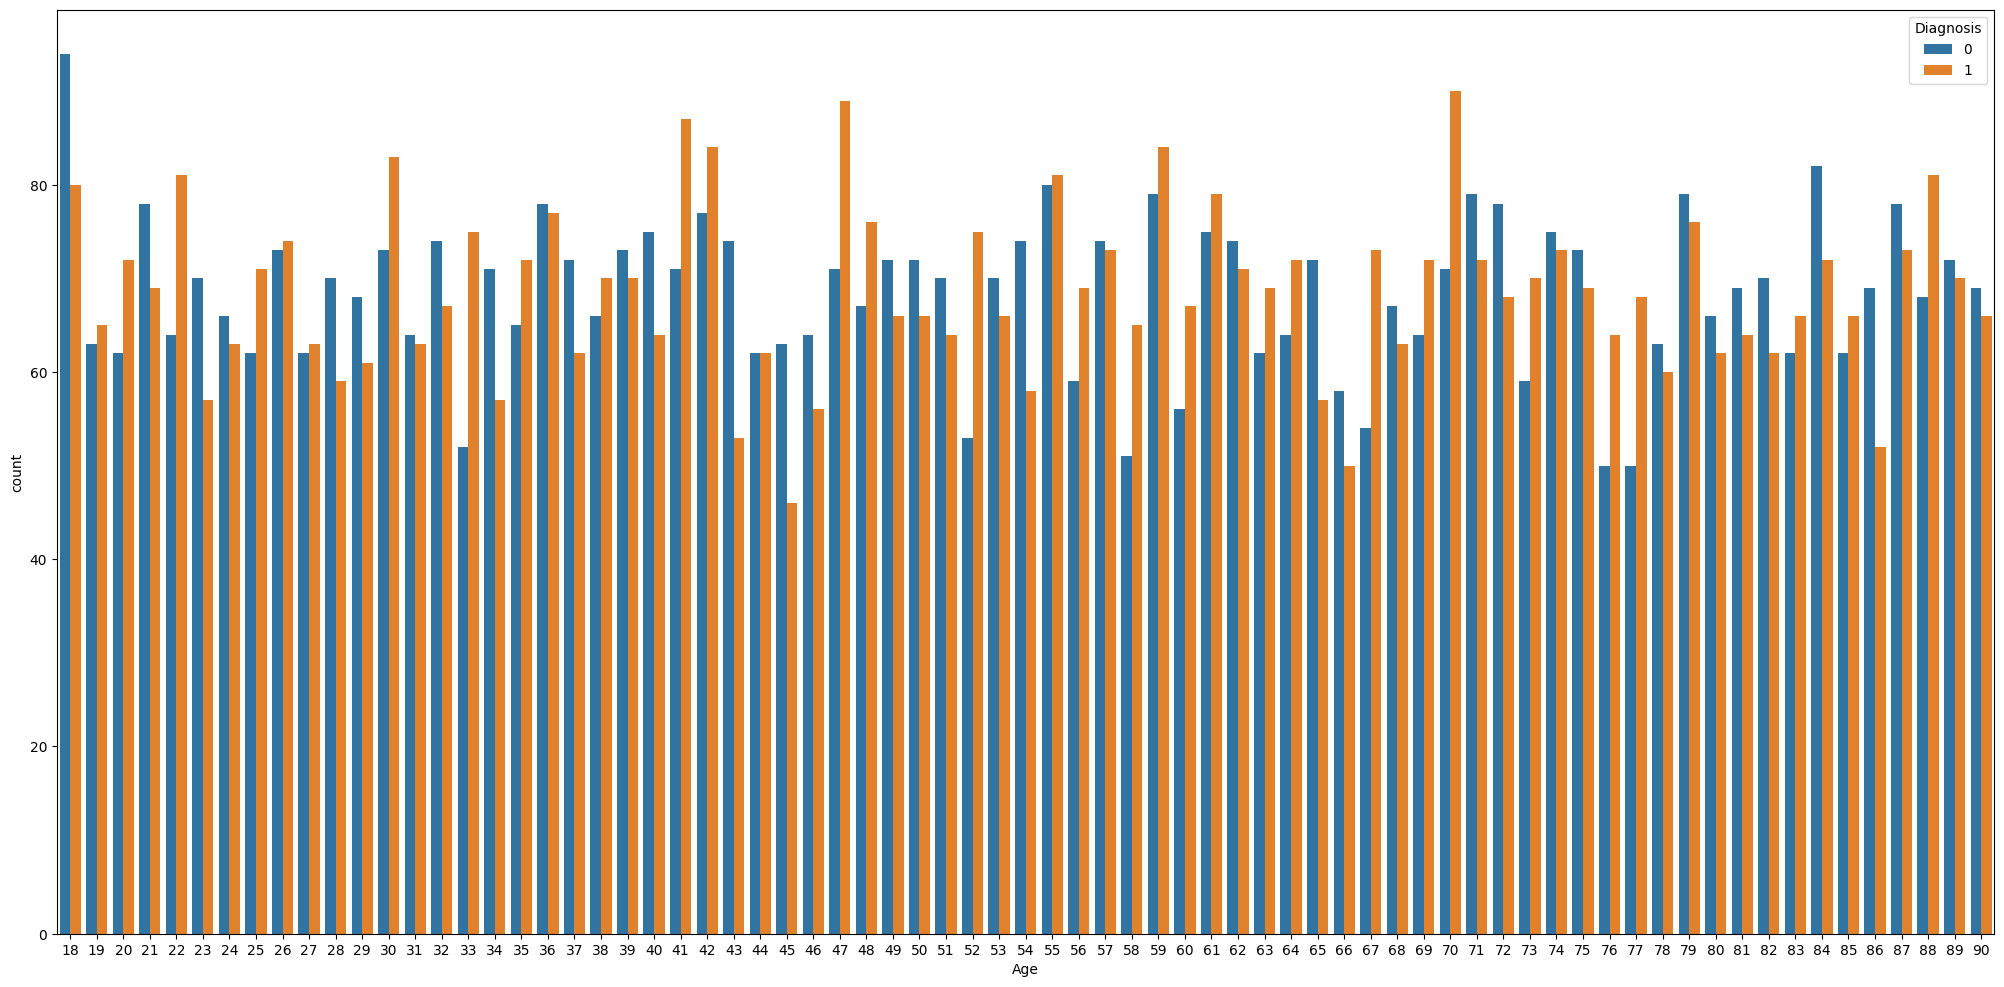

In [286]:
plt.figure(figsize=(25,12))
sns.countplot(data=df,x='Age',hue='Diagnosis')

<Axes: xlabel='Symptom_1', ylabel='count'>

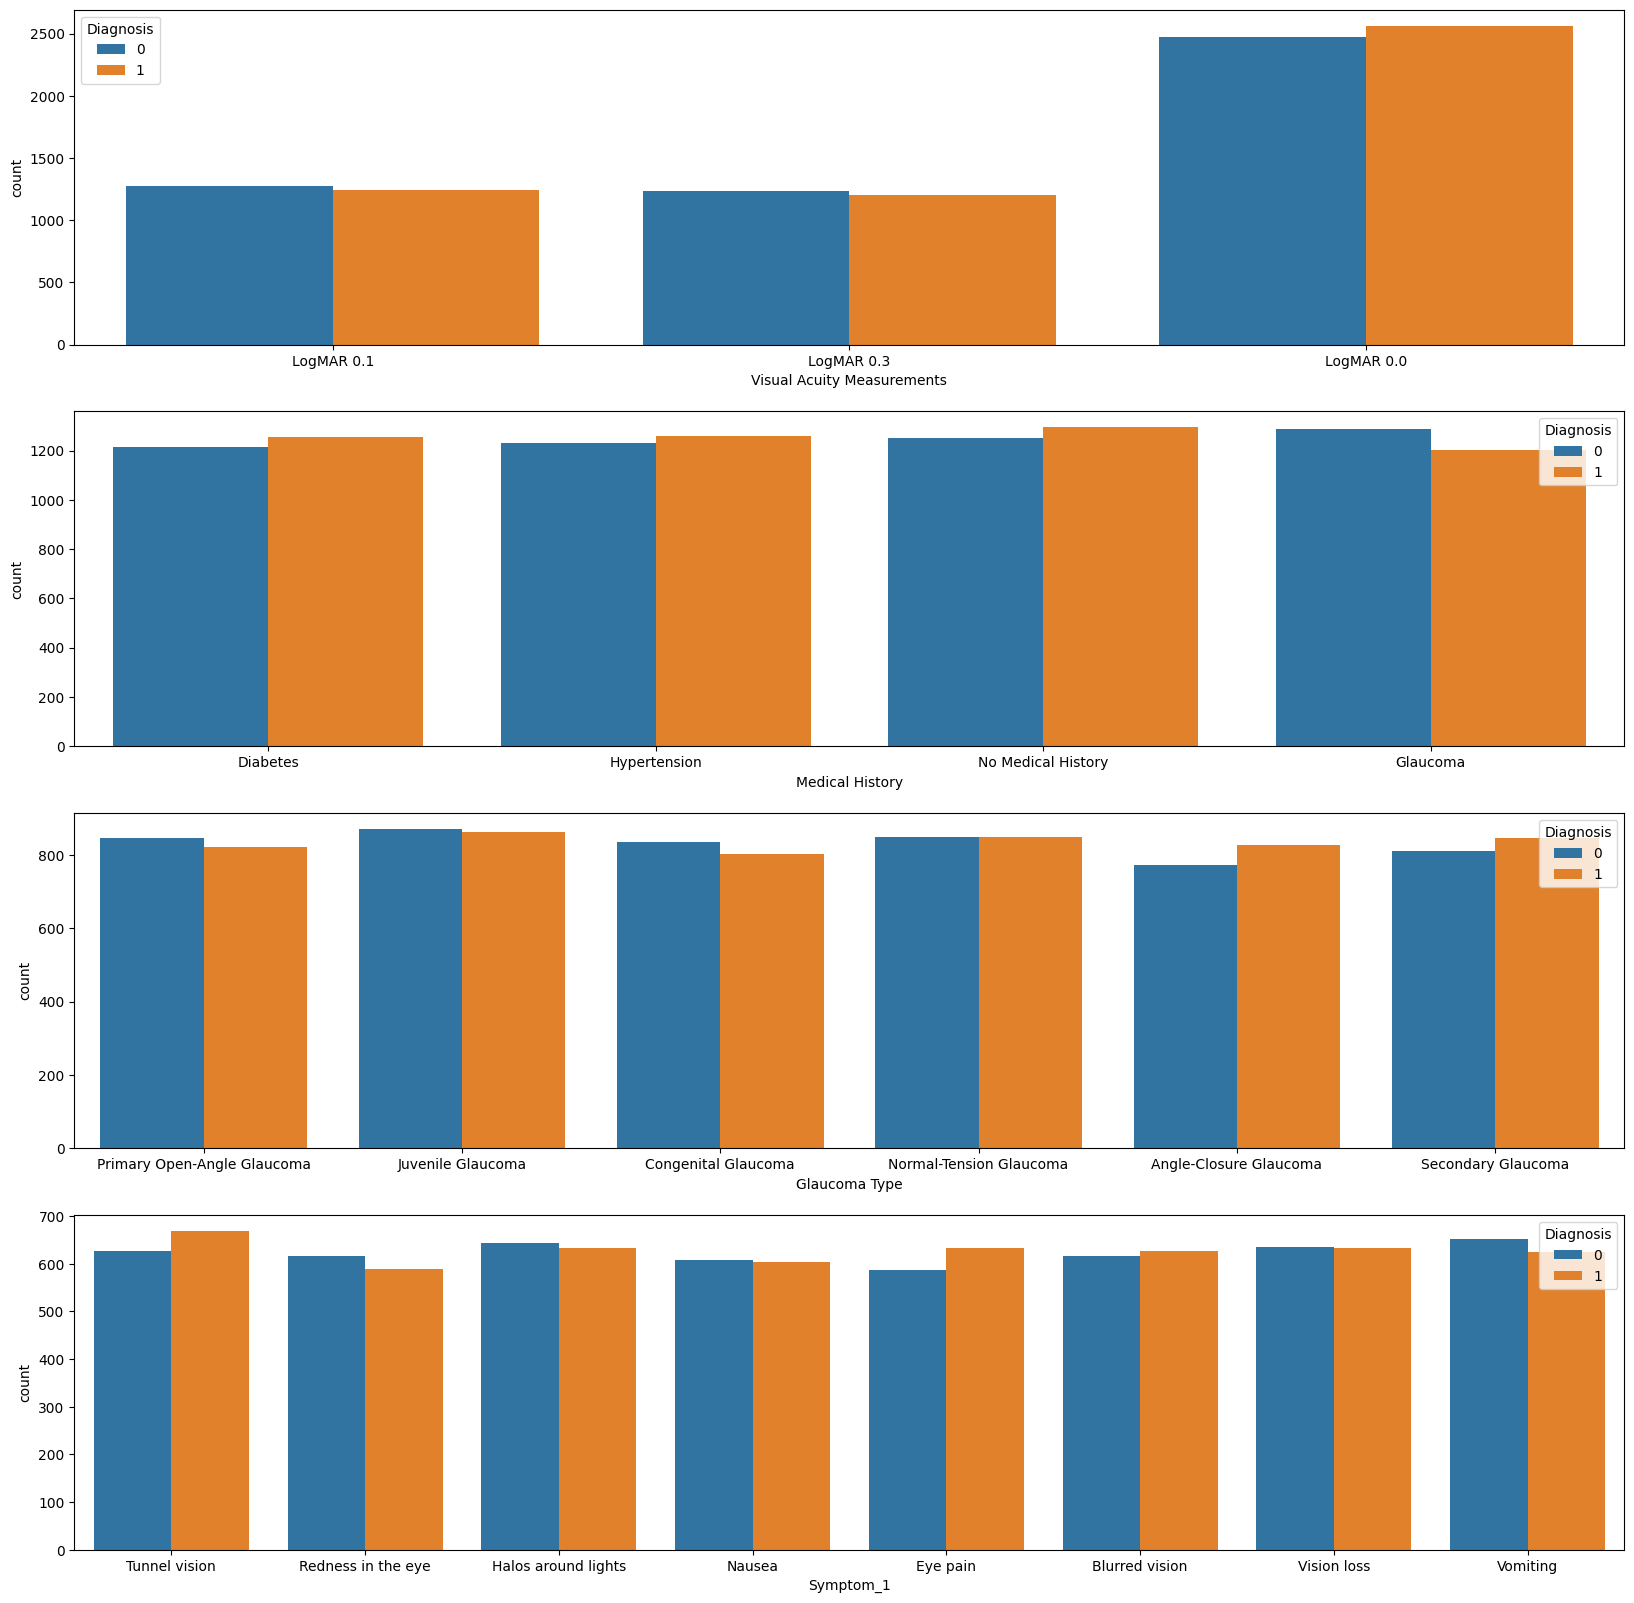

In [287]:
plt.figure(figsize=(20,20))
plt.subplot(411) 
sns.countplot(data=df,x='Visual Acuity Measurements',hue='Diagnosis')
plt.subplot(412)
sns.countplot(data=df,x='Medical History',hue='Diagnosis')
plt.subplot(413)
sns.countplot(data=df,x='Glaucoma Type',hue='Diagnosis')
plt.subplot(414)
sns.countplot(data=df,x='Symptom_1',hue='Diagnosis')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9280\4137172542.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=have_df,x='Intraocular Pressure (IOP)',shade=True,color='r')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9280\4137172542.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=donthave_df,x='Intraocular Pressure (IOP)',shade=True,color='b')


Text(0.5, 0, 'Intraocular Pressure (IOP)')

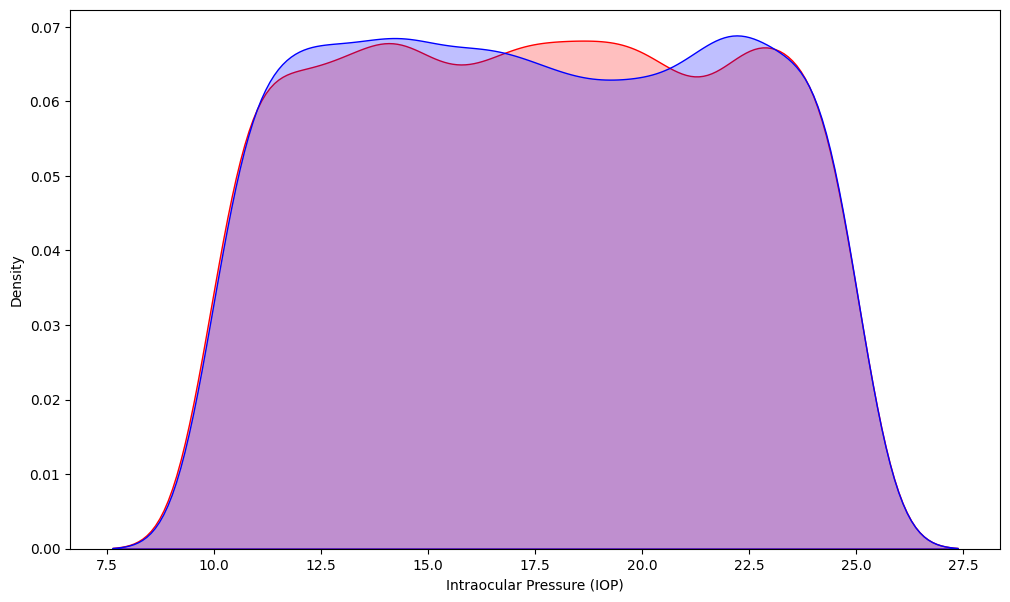

In [288]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=have_df,x='Intraocular Pressure (IOP)',shade=True,color='r')
sns.kdeplot(data=donthave_df,x='Intraocular Pressure (IOP)',shade=True,color='b')
plt.xlabel('Intraocular Pressure (IOP)')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9280\258398799.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=have_df,x='Pachymetry',shade=True,color='r')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9280\258398799.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=donthave_df,x='Pachymetry',shade=True,color='b')


Text(0.5, 0, 'Pachymetry')

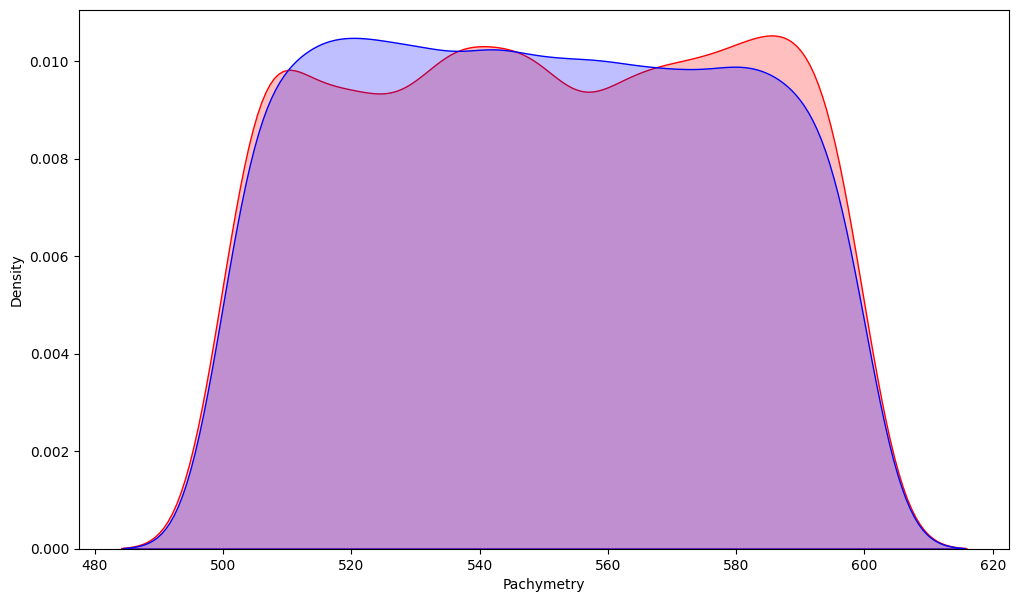

In [289]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=have_df,x='Pachymetry',shade=True,color='r')
sns.kdeplot(data=donthave_df,x='Pachymetry',shade=True,color='b')
plt.xlabel('Pachymetry')

<Axes: xlabel='Intraocular Pressure (IOP)', ylabel='Gender'>

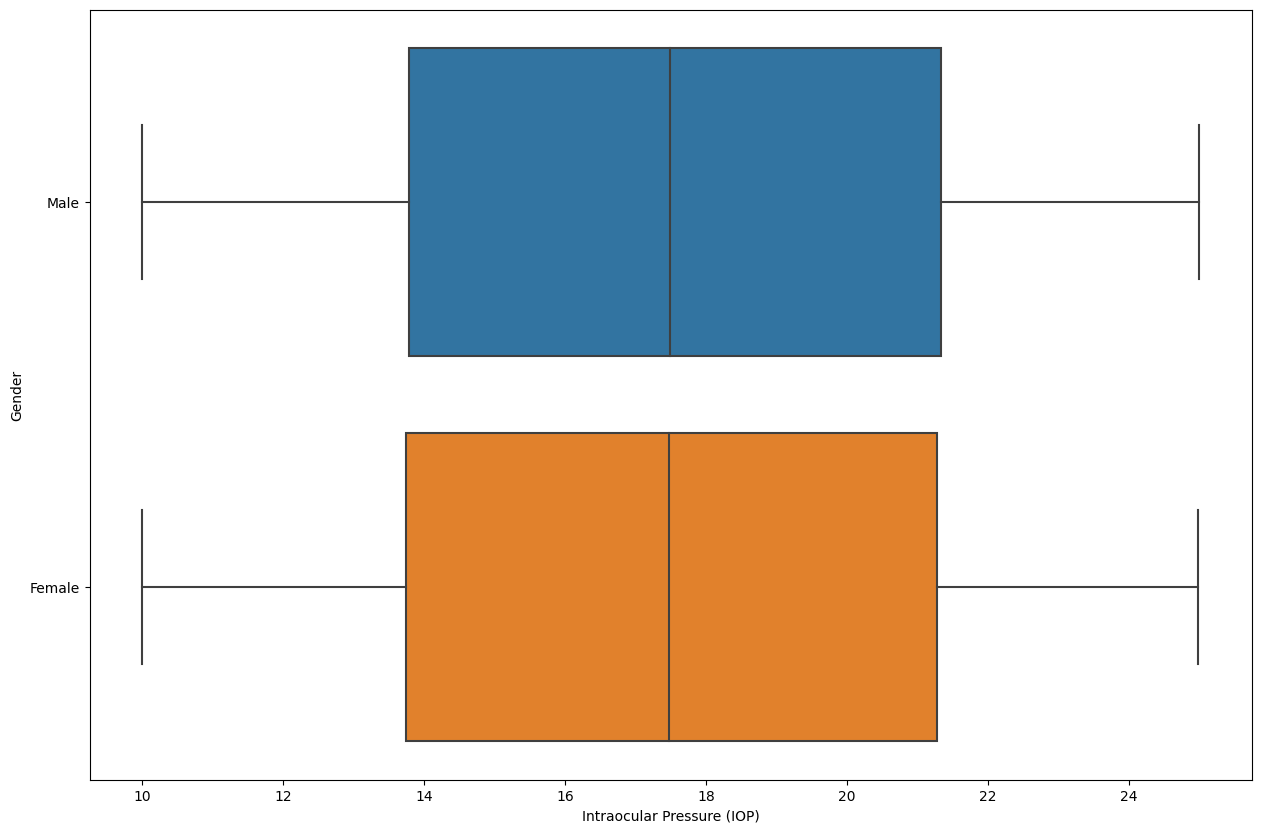

In [290]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Intraocular Pressure (IOP)',y='Gender')

In [291]:
df.columns

Index(['Age', 'Gender', 'Visual Acuity Measurements',
       'Intraocular Pressure (IOP)', 'Cup-to-Disc Ratio (CDR)',
       'Family History', 'Medical History', 'Medication Usage', 'Pachymetry',
       'Cataract Status', 'Angle Closure Status', 'Diagnosis', 'Glaucoma Type',
       'Test Sensitivity', 'Test Specificity', 'OCT_RNFL', 'OCT_GCC',
       'Retinal Volume', 'OCT_Macular', 'Symptom_1', 'Symptom_2', 'Symptom_3'],
      dtype='object')

<Axes: xlabel='Cup-to-Disc Ratio (CDR)', ylabel='Glaucoma Type'>

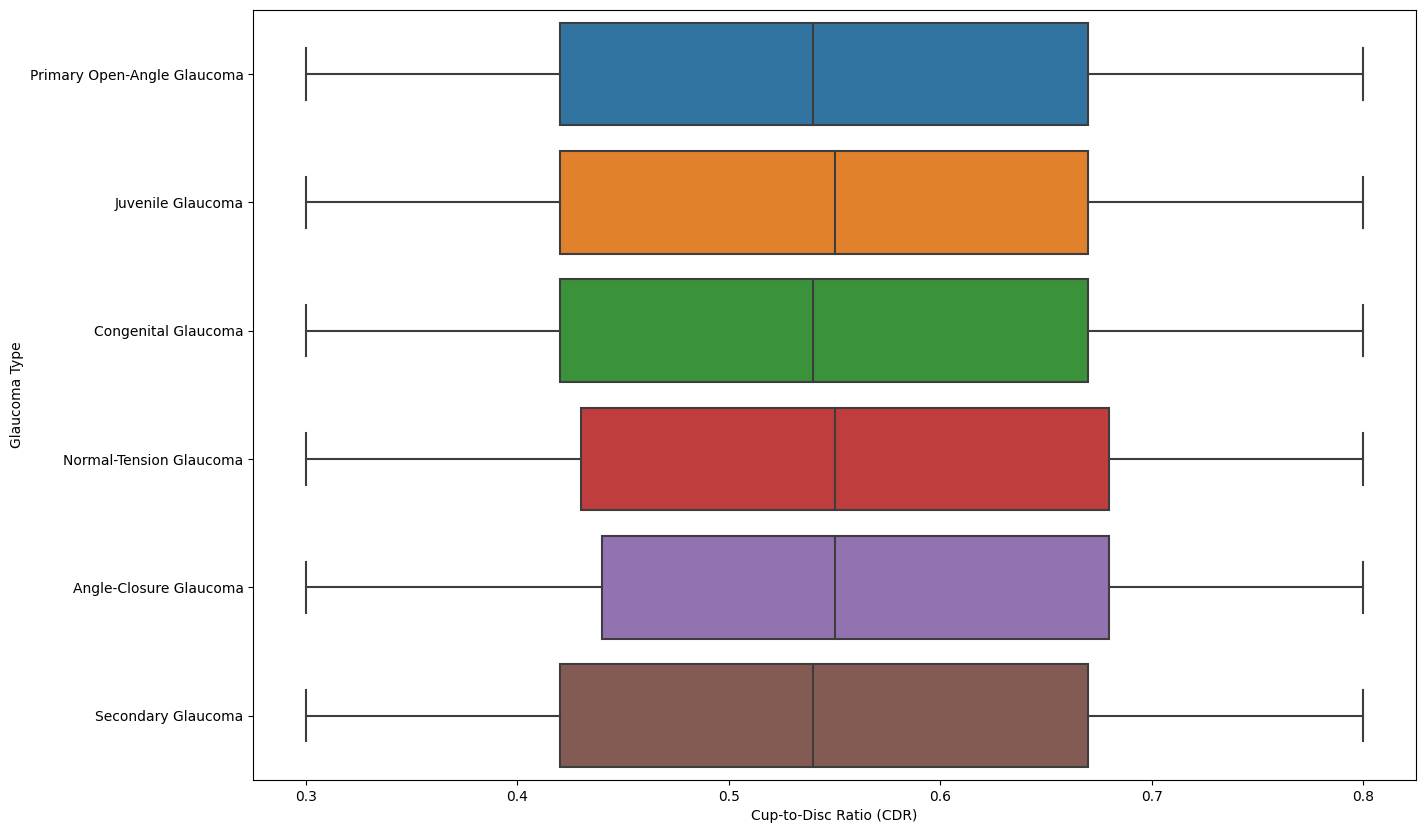

In [292]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Cup-to-Disc Ratio (CDR)',y='Glaucoma Type')

In [293]:
cat=df.select_dtypes('O')
cat.columns

Index(['Gender', 'Visual Acuity Measurements', 'Medical History',
       'Medication Usage', 'Glaucoma Type', 'Test Sensitivity',
       'Test Specificity', 'OCT_RNFL', 'OCT_GCC', 'Retinal Volume',
       'OCT_Macular', 'Symptom_1', 'Symptom_2', 'Symptom_3'],
      dtype='object')

In [294]:
from sklearn.preprocessing import OneHotEncoder

In [295]:
ohe=OneHotEncoder()
cat=ohe.fit_transform(cat).toarray()

In [296]:
cat.shape

(10000, 11148)

In [297]:
cat=pd.DataFrame(cat)
cat

,0,1,2,3,4,5,6,7,8,9,...,11138,11139,11140,11141,11142,11143,11144,11145,11146,11147
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [298]:
num=df.select_dtypes('number')
num.columns

Index(['Age', 'Intraocular Pressure (IOP)', 'Cup-to-Disc Ratio (CDR)',
       'Family History', 'Pachymetry', 'Cataract Status',
       'Angle Closure Status', 'Diagnosis'],
      dtype='object')

In [299]:
num_cols=num[['Age', 'Intraocular Pressure (IOP)', 'Cup-to-Disc Ratio (CDR)',
       'Family History', 'Pachymetry', 'Cataract Status',
       'Angle Closure Status']]
num_cols=pd.DataFrame(num_cols)
num_cols

,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Pachymetry,Cataract Status,Angle Closure Status
0,69,19.46,0.42,0,541.51,1,1
1,69,18.39,0.72,0,552.77,0,1
2,67,23.65,0.72,0,573.65,0,0
3,23,18.04,0.61,0,590.67,0,0
4,21,15.87,0.30,0,588.41,0,0
...,...,...,...,...,...,...,...
9995,81,22.83,0.49,0,576.53,0,1
9996,65,11.72,0.54,0,548.10,0,1
9997,56,10.67,0.56,1,513.74,1,1
9998,26,23.37,0.74,0,585.03,0,0


In [300]:
x_all=pd.concat([cat,num_cols],axis=1)

In [301]:
x_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 11155 entries, 0 to Angle Closure Status
dtypes: float64(11151), int64(4)
memory usage: 851.1 MB


In [302]:
from sklearn.preprocessing import MinMaxScaler

In [303]:
scaler=MinMaxScaler()

In [304]:
X = x_all.values
X

array([[  0.  ,   1.  ,   0.  , ..., 541.51,   1.  ,   1.  ],
       [  1.  ,   0.  ,   0.  , ..., 552.77,   0.  ,   1.  ],
       [  1.  ,   0.  ,   0.  , ..., 573.65,   0.  ,   0.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ..., 513.74,   1.  ,   1.  ],
       [  0.  ,   1.  ,   0.  , ..., 585.03,   0.  ,   0.  ],
       [  0.  ,   1.  ,   1.  , ..., 510.1 ,   0.  ,   1.  ]])

In [305]:
x_pre=scaler.fit_transform(X)

In [306]:
x_pre

array([[0.        , 1.        , 0.        , ..., 0.41508302, 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.52770554, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.73654731, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.13732747, 1.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.85037007, 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.10092018, 0.        ,
        1.        ]])

In [307]:
y=df['Diagnosis']
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: Diagnosis, Length: 10000, dtype: int64

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(x_pre,y,test_size=0.2)

In [309]:
X_train.shape

(8000, 11155)

In [310]:
X_test.shape

(2000, 11155)

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [313]:
model=LogisticRegression(solver='liblinear')

In [314]:
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [315]:
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [317]:
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy {} %".format(100*accuracy_score(y_pred,y_test)))

Accuracy 49.6 %


array([[470, 550],
       [458, 522]], dtype=int64)

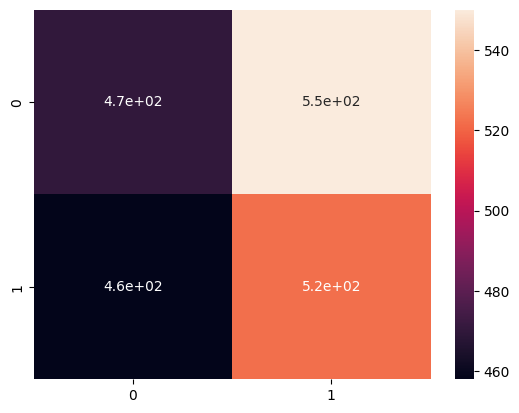

In [319]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
confusion_matrix(y_test, y_pred)

In [320]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.51      0.46      0.48      1020
           1       0.49      0.53      0.51       980

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [321]:
from sklearn.ensemble import RandomForestClassifier
model2= RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [322]:
y_pred=model2.predict(X_test)

array([[462, 558],
       [445, 535]], dtype=int64)

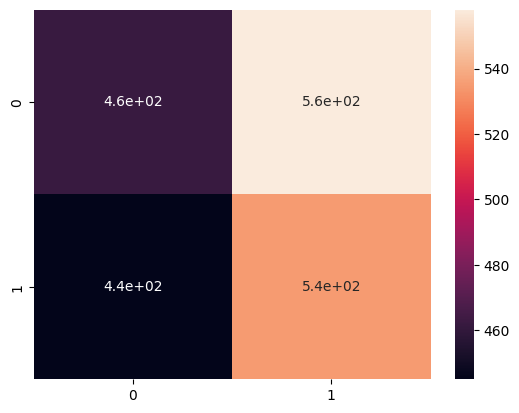

In [325]:

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
confusion_matrix(y_test, y_pred)

In [326]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.45      0.48      1020
           1       0.49      0.55      0.52       980

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [327]:
import tensorflow as tf

In [328]:
model3=tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape=(11155, )))
model3.add(tf.keras.layers.Dense(units=500,activation='relu'))
model3.add(tf.keras.layers.Dense(units=500,activation='relu'))
model3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [329]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               5578000   
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 6,079,501
Trainable params: 6,079,501
Non-trainable params: 0
_________________________________________________________________


In [330]:
model3.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [331]:
epochs_hist=model3.fit(X_train,y_train,epochs=30,batch_size=50)

Epoch 1/30
160/160 [==============================] - 6s 35ms/step - loss: 0.6947 - accuracy: 0.4996
Epoch 2/30
160/160 [==============================] - 5s 34ms/step - loss: 0.6060 - accuracy: 0.6684
Epoch 3/30
160/160 [==============================] - 5s 34ms/step - loss: 0.0987 - accuracy: 0.9666
Epoch 4/30
160/160 [==============================] - 5s 32ms/step - loss: 0.0045 - accuracy: 0.9984
Epoch 5/30
160/160 [==============================] - 5s 33ms/step - loss: 2.5789e-04 - accuracy: 1.0000
Epoch 6/30
160/160 [==============================] - 5s 33ms/step - loss: 3.9096e-05 - accuracy: 1.0000
Epoch 7/30
160/160 [==============================] - 6s 34ms/step - loss: 2.5037e-05 - accuracy: 1.0000
Epoch 8/30
160/160 [==============================] - 6s 35ms/step - loss: 1.7732e-05 - accuracy: 1.0000
Epoch 9/30
160/160 [==============================] - 5s 34ms/step - loss: 1.3166e-05 - accuracy: 1.0000
Epoch 10/30
160/160 [==============================] - 6s 35ms/step - l

In [332]:
y_pred=model3.predict(X_test)
y_pred

63/63 [==============================] - 1s 6ms/step


array([[9.9992663e-01],
       [4.9715438e-01],
       [9.8500615e-01],
       ...,
       [5.1153838e-05],
       [5.1524019e-01],
       [4.3407929e-01]], dtype=float32)

In [333]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [334]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

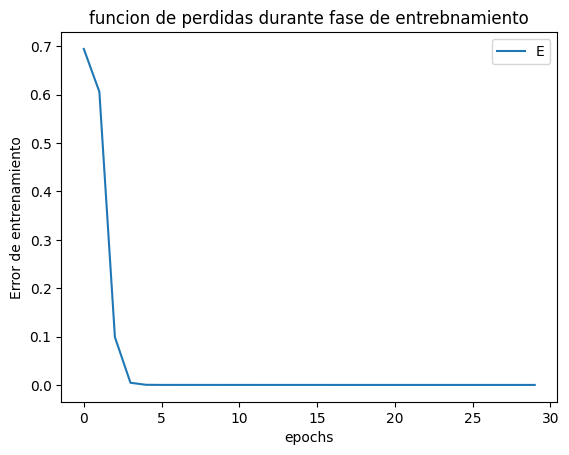

In [335]:
plt.plot(epochs_hist.history['loss'])
plt.title('funcion de perdidas durante fase de entrebnamiento')
plt.xlabel('epochs')
plt.ylabel('Error de entrenamiento')
plt.legend('Error de entrebamiento')

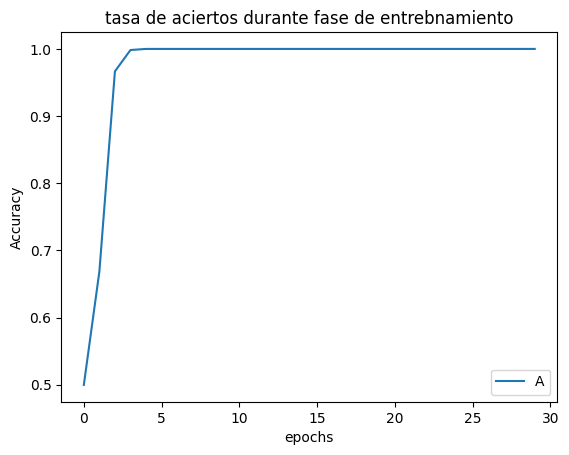

In [336]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('tasa de aciertos durante fase de entrebnamiento')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend('Accuracy de entrebamiento')

In [337]:
cm=confusion_matrix(y_test,y_pred)

array([[511, 509],
       [516, 464]], dtype=int64)

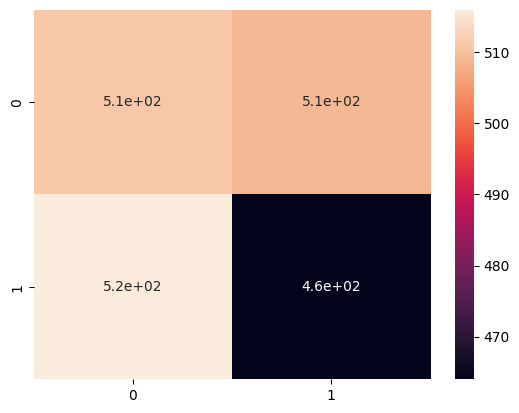

In [338]:
sns.heatmap(cm,annot=True)
confusion_matrix(y_test, y_pred)

In [339]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1020
           1       0.48      0.47      0.48       980

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

